# Data scientist in Latin America and their wages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
from collections import Counter
import math
import seaborn as sns
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing
import scipy.integrate
import sklearn.discriminant_analysis
import itertools

In [2]:
data=pd.read_csv("kaggle-survey-2018/multipleChoiceResponses.csv")
preguntas=data.iloc[:1]
data = data.iloc[1:]

/srv/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The idea of this little study is to see if it is possible to determine what variables are the most importat to determine the wage working in Data science in Latin America.

To see this we first visualize the data given by Kaggle and we determine which countries participated in the survey

In [3]:
data=data[data["Q3"]!="I do not wish to disclose my location"]
a=Counter(data["Q3"])
a['United States'] = a.pop("United States of America")
a["United Kingdom"] = a.pop("United Kingdom of Great Britain and Northern Ireland")
a["Iran, Islamic Rep."] = a.pop("Iran, Islamic Republic of...")
a["Hong Kong SAR, China"] = a.pop("Hong Kong (S.A.R.)")
a["Korea, Dem. People’s Rep."] = a.pop("Republic of Korea")
a["Korea, Rep."] = a.pop("South Korea")

In [4]:
poblacion=pd.read_csv("https://raw.githubusercontent.com/datasets/population/master/data/population.csv")
population=poblacion.iloc[2624:]
population=population[population["Year"]==2016]

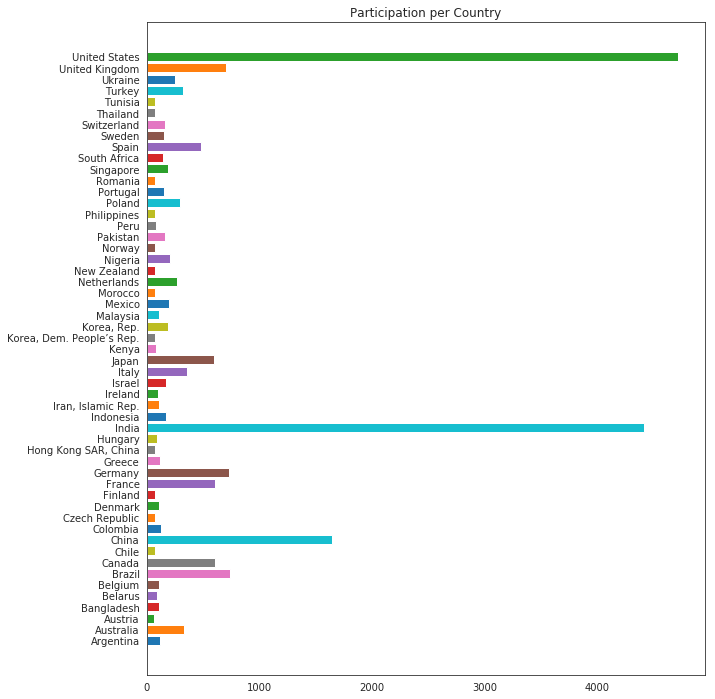

In [5]:
sns.set_style("white")
plt.figure(figsize=(10,12))
for i in population["Country Name"]:
    if i in a:
        plt.barh(i,a[i])
plt.title("Participation per Country")
plt.show()  

Now just for curiosity we visualize what proportion of the country this sample represent, for do that we use the data given the [World bank dataset](https://data.worldbank.org/indicator/SP.POP.TOTL) in order to compare with the total population of these contries.

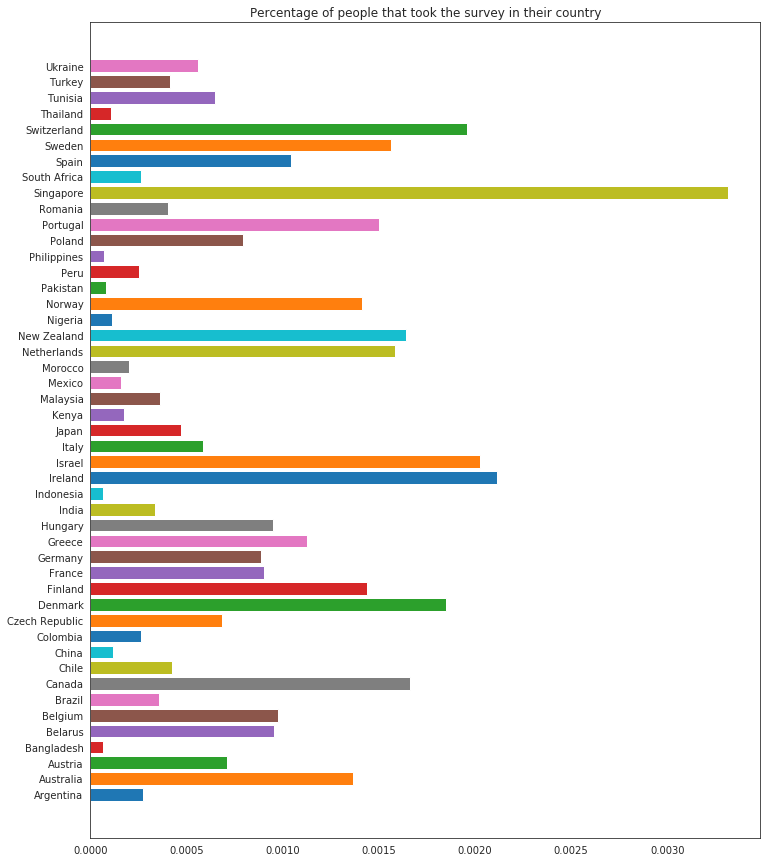

In [6]:
population['new_index'] = range(len(population)) #orders the list
population = population.set_index('new_index')
proportion = {}
for l in range(len(population['Country Name'])):
    proportion[population['Country Name'][l]] = population['Value'][l]
sns.set_style("white")
plt.figure(figsize=(12,15))
porcentage_data = {}
for i in population['Country Name']:
    if i in Counter(data.Q3):
        porcentage_data[i] = (a[i]/proportion[i])*100
        plt.barh(i,(a[i]/proportion[i])*100)
plt.title('Percentage of people that took the survey in their country')
plt.show()

We we see that apparently Singapore seems to be the country with more participation.

Now the next question we ask what is the proportion of women that participate for some random countries

# Gender In Countries

First we visualize the total number of women vs the total number of men tath answer the survey

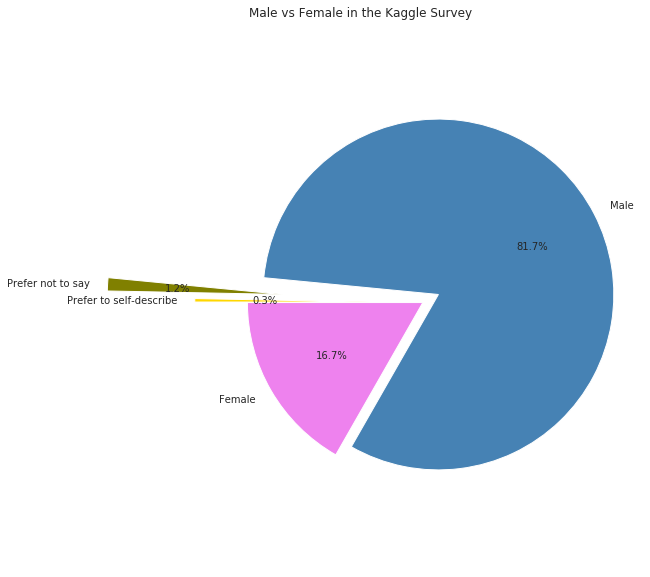

In [7]:
total=len(data)
labels=[]
values=[]
sns.set_style("white")
plt.figure(figsize=(10,10))
for i in sorted(Counter(data["Q1"])):
    labels.append(i)
    values.append(Counter(data["Q1"])[i])
colors=["violet","steelblue","olive","gold"]
explode = (0, 0.1, 0.8, 0.3)
plt.pie(values,labels=labels,shadow=False,colors=colors,explode=explode,startangle=180,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Male vs Female in the Kaggle Survey")
matplotlib.rcParams['font.size'] = 16.0
plt.show()

Since it seems particular our first question is if this proportion is conserved in all different countries, in order to see this, we fisrt start by plotting what it seems to be the two most representative Countries (USA and India)

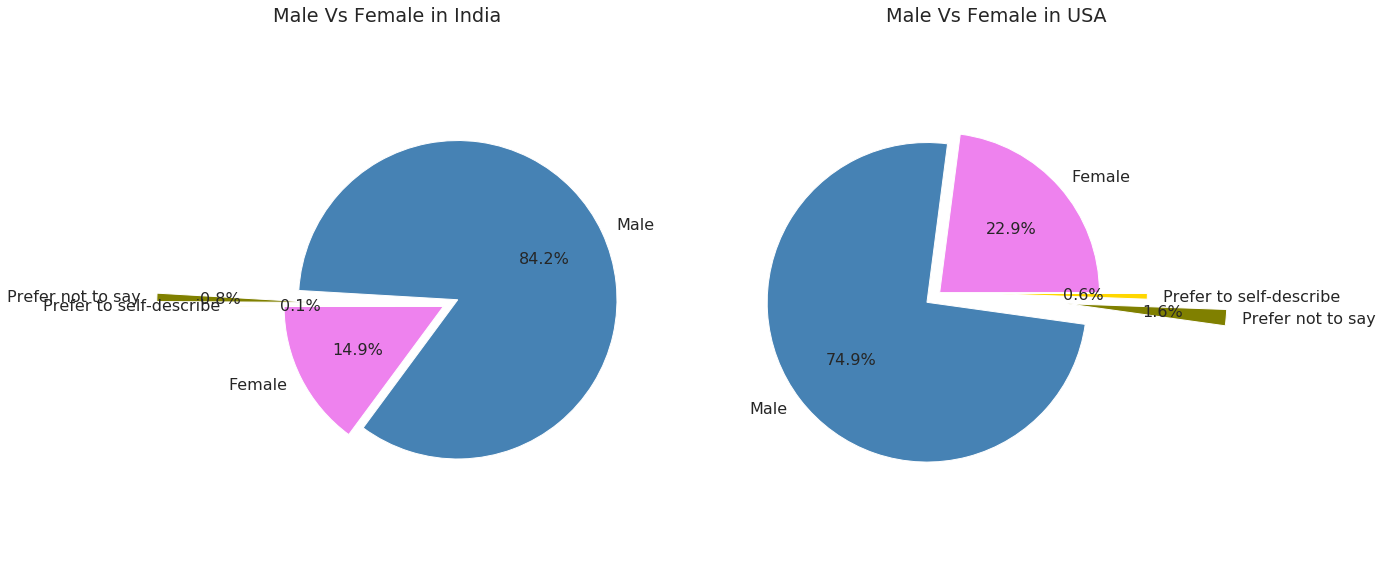

In [8]:
plt.figure(figsize=(20,10))
datos_India=data[data.Q3=="India"]
total= len(data)
labels=[]
values=[]
for i in sorted(Counter(datos_India["Q1"])):
    labels.append(i)
    values.append(Counter(datos_India["Q1"])[i])
colors=["violet","steelblue","olive","gold"]
explode = (0, 0.1, 0.8, 0.3)
plt.subplot(1,2,1)
plt.pie(values,labels=labels,shadow=False,colors=colors,explode=explode,startangle=180,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Male Vs Female in India")
datos_USA=data[data.Q3=="United States of America"]
total= len(data)
labels=[]
values=[]
for i in sorted(Counter(datos_USA["Q1"])):
    labels.append(i)
    values.append(Counter(datos_USA["Q1"])[i])
colors=["violet","steelblue","olive","gold"]
explode = (0, 0.1, 0.8, 0.3)
plt.subplot(1,2,2)
plt.pie(values,labels=labels,shadow=False,colors=colors,explode=explode,startangle=0,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Male Vs Female in USA")
matplotlib.rcParams['font.size'] = 16.0
plt.show()

As we see it look almost the same as the first plot, now we take some random countries and we see if this behaviour can be seen in all the countries.

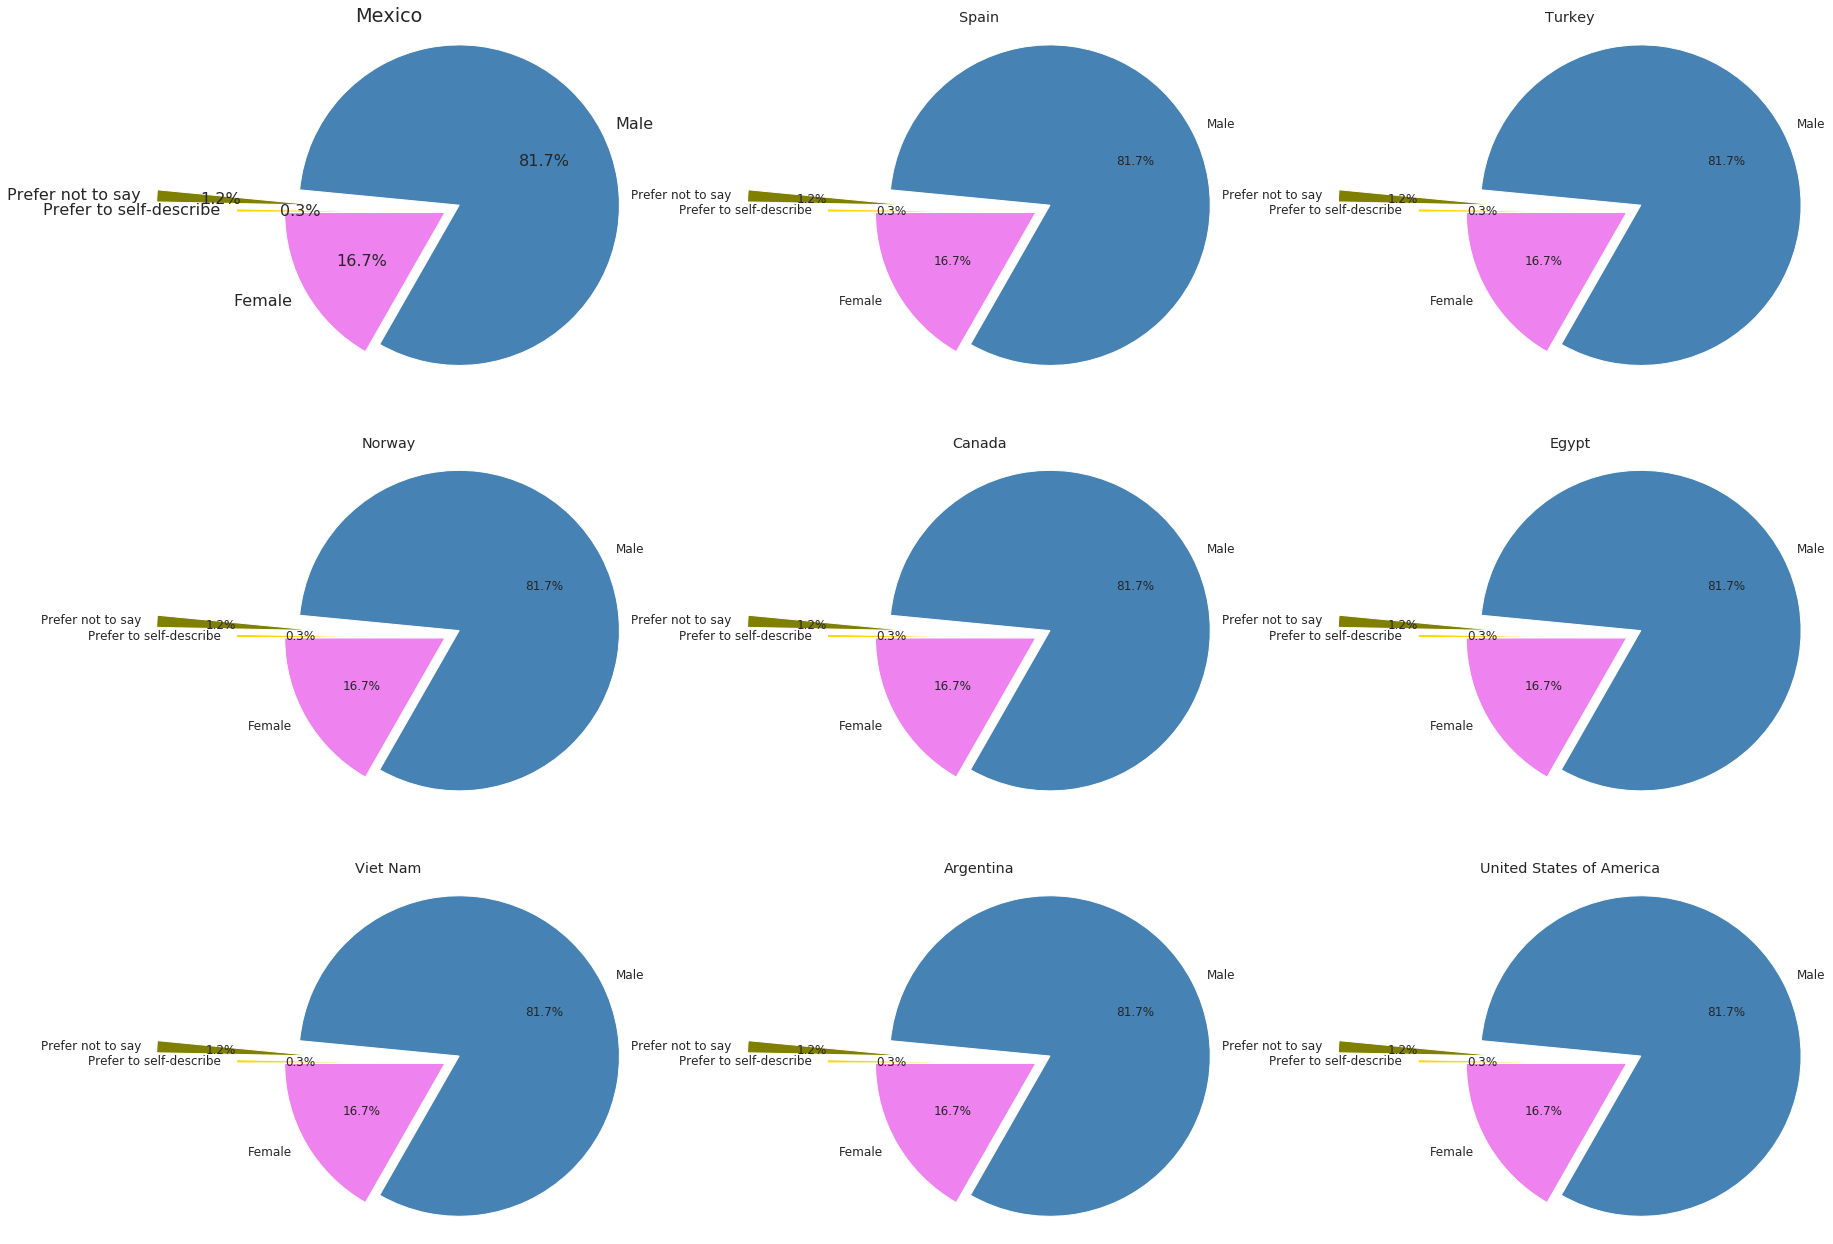

In [9]:
countries=np.random.choice(sorted(Counter(data["Q3"])),9,replace=False)
k=1
plt.figure(figsize=(30,30))
for c in countries:
    total=len(data)
    labels=[]
    values=[]
    for i in sorted(Counter(data["Q1"])):
        labels.append(i)
        values.append(Counter(data["Q1"])[i])
    colors=["violet","steelblue","olive","gold"]
    explode = (0, 0.1, 0.8, 0.3)
    plt.subplot(4,3,k)
    plt.pie(values,labels=labels,shadow=False,colors=colors,explode=explode,startangle=180,autopct='%1.1f%%')
    plt.axis("equal")
    plt.title(c)
    k+=1
    matplotlib.rcParams['font.size'] = 12.0
plt.show()

As we want to study the important variables that determine wages in Latin america we first visualize the data for the Latin american Countries

# Gender in Latin-America

In [10]:
def plot_Lat_america(data):
    total= len(data)
    labels=[]
    values=[]
    for i in sorted(Counter(data)):
        labels.append(i)
        values.append(Counter(data)[i])
    return labels, values


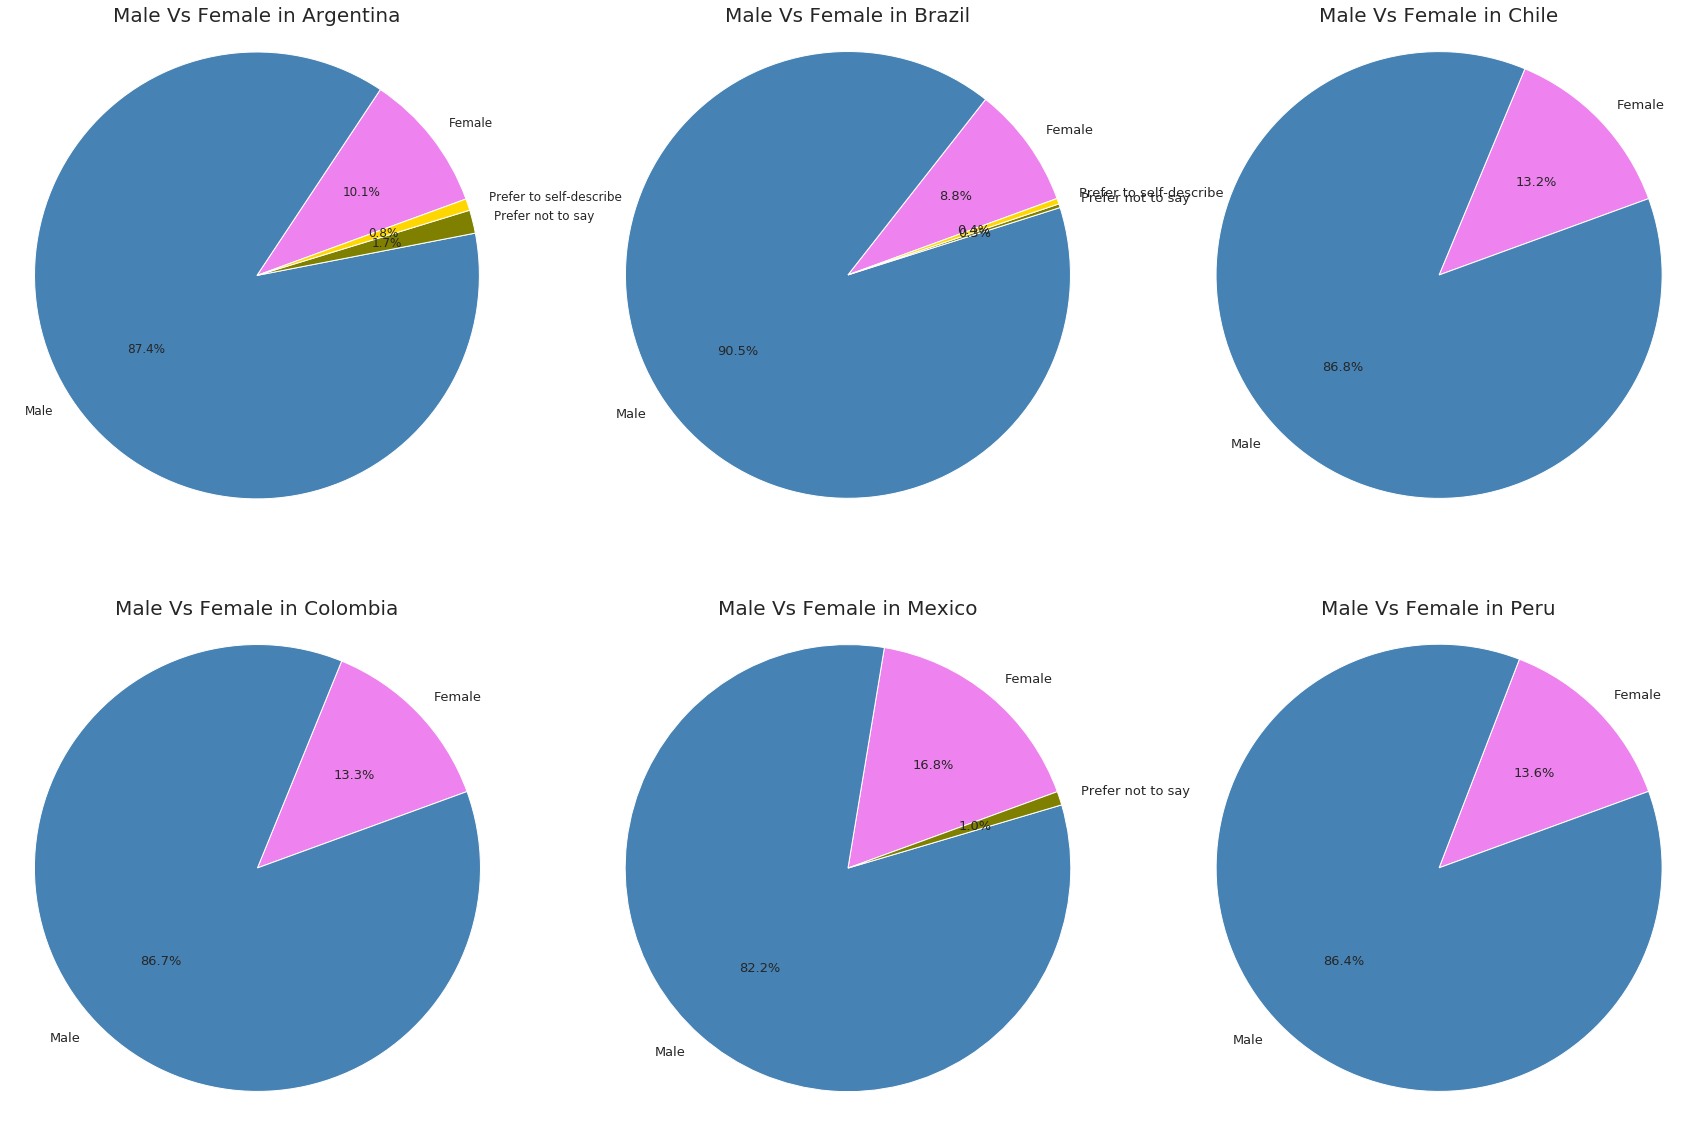

In [11]:
plt.figure(figsize=(30,20))
Lat_american=["Argentina","Brazil","Chile","Colombia","Mexico","Peru"]
k=1
for i in Lat_american:
    datos_lat=data[data.Q3==i]
    labels,values=plot_Lat_america(datos_lat.Q1)
    colors=["violet","steelblue","olive","gold"]
    plt.subplot(2,3,k)
    plt.pie(values,labels=labels,shadow=False,colors=colors,startangle=20,autopct='%1.1f%%')
    plt.axis("equal")
    plt.title("Male Vs Female in "+i,size=20)
    matplotlib.rcParams['font.size'] = 13.0
    k+=1
    
plt.show()

Even though some Latin american countries seem to have the same behaviour, we first stablish that since the participation of women around the world seems to be the same it might not be a representative variable to determine the salaries in Latin America.
However, since this is not a real test start asking what we can use in order to determine the most important variables to predict the wages of a someone who works with data in Latin America.

# Variables we consider

Since the survey had a lot of information we could use, we simply use some variables we consider were important to determine the wage of a person, these are:
* __Gender__
* __Age__
* __Education__ 
* __Experience__ 

In [12]:
data = data.rename(columns={'Q1':'Gender','Q2': 'Age', 'Q3': 'Country', 'Q4': 'Education', 'Q5': 'Major', 'Q6': 'Role', 
                            'Q7': 'industry','Q8': 'Experience', 'Q9': 'Salary'})

In [13]:
#check if we have enough data to work with
for i in Lat_american:
    datos_lat=data[data.Country==i]
    idd=0
    for j in datos_lat.Salary.dropna():
        if len(j)>20:
            #print(j[:-4].split("-"))
            idd+=1
    #print(i,idd,str(len(datos_lat.Salary.dropna())/idd)+"%")

In [14]:
nuevo_dict={}
for i in Lat_american:
    nuevo=data[data.Country==i]
    nuevo=nuevo[nuevo.Education != "I prefer not to answer"]
    nuevo=nuevo[nuevo.Education != 'No formal education past high school']
    for j in Counter(nuevo.Education.dropna()).keys():
        if i in nuevo_dict:
            nuevo_dict[i].append(Counter(nuevo.Education.dropna())[j])
        else:
            nuevo_dict[i]=[Counter(nuevo.Education.dropna())[j]]

# Education in Latin America

We first ask about Education, in order to visualize how many people in each country have an eduation of at least "Some college/university study without earning a bachelor’s degree" in the diferent latin american countries, we plot the results of the survey in the next chart.

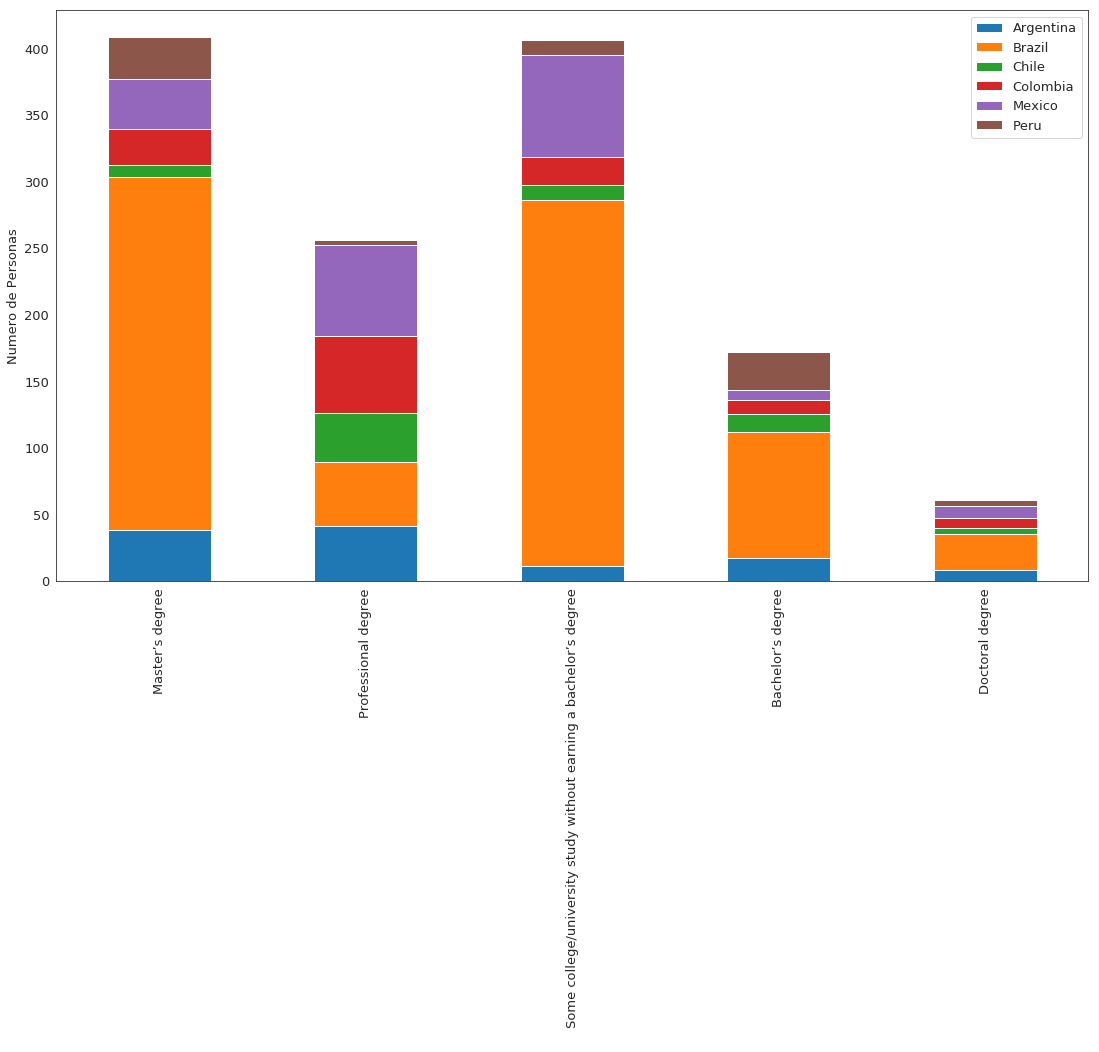

In [15]:
sns.set_style("white")
x_axis=list(Counter(nuevo.Education.dropna()).keys())
index = pd.Index(x_axis, name=' ')
datos_education = nuevo_dict
df = pd.DataFrame(datos_education, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
ax.set_ylabel('Numero de Personas')
plt.show()

In [16]:
New_data=data
New_data=New_data[New_data['Salary'] != 'I do not wish to disclose my approximate yearly compensation']

In [17]:
#redefine salary

salaries = np.zeros(len(New_data))
num = 0
for string in New_data['Salary']:
    try:
        math.isnan(string)
        salaries[num] = float('NaN')
        num += 1
    except:
        if string == '500,000+':
            salaries[num] = 500.0
        else:
            salaries[num] = np.mean(np.int_(np.array(string[:-4].split('-'))))
        num+=1
New_data['Salary(USD)']=salaries

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [18]:
def Get_newColumn(dataframe,characteristic, to_ignore,return_to_ignore, name_to_return):
    New_arr=np.zeros(len(dataframe))
    index=0
    for char in dataframe[characteristic]:
        try:
            math.isnan(char)
            New_arr[index]=float('NaN')
            index +=1
        except:
            if char == to_ignore:
                New_arr[index]= return_to_ignore
            else:
                New_arr[index]= np.mean(np.int_(np.array(char.split("-"))))
            index+=1
    dataframe[name_to_return]= New_arr
    return dataframe

In [19]:
New_data=Get_newColumn(New_data,'Age',"80+",80.0,"New_Age")
New_data=Get_newColumn(New_data,'Experience',"30 +",30.0,"New_Experience")

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# Does the everyone has a fair salary?

To get an idea of the wages in different countries we analyse how many people of the survey earn less than the median of salary in their countries.


In order to do that we first start visualazing how many people earn more than the median in their country. Our result is astonishing, since, the developed countries seem to be the ones that have an equal proportion of people that earn the below the median and people that don't. Whereas in the case of the developing countries we see the opposite.

This is the reason why we consider convinient to determine if in Latin america the fact that someone earns less than the median is related with other variables.

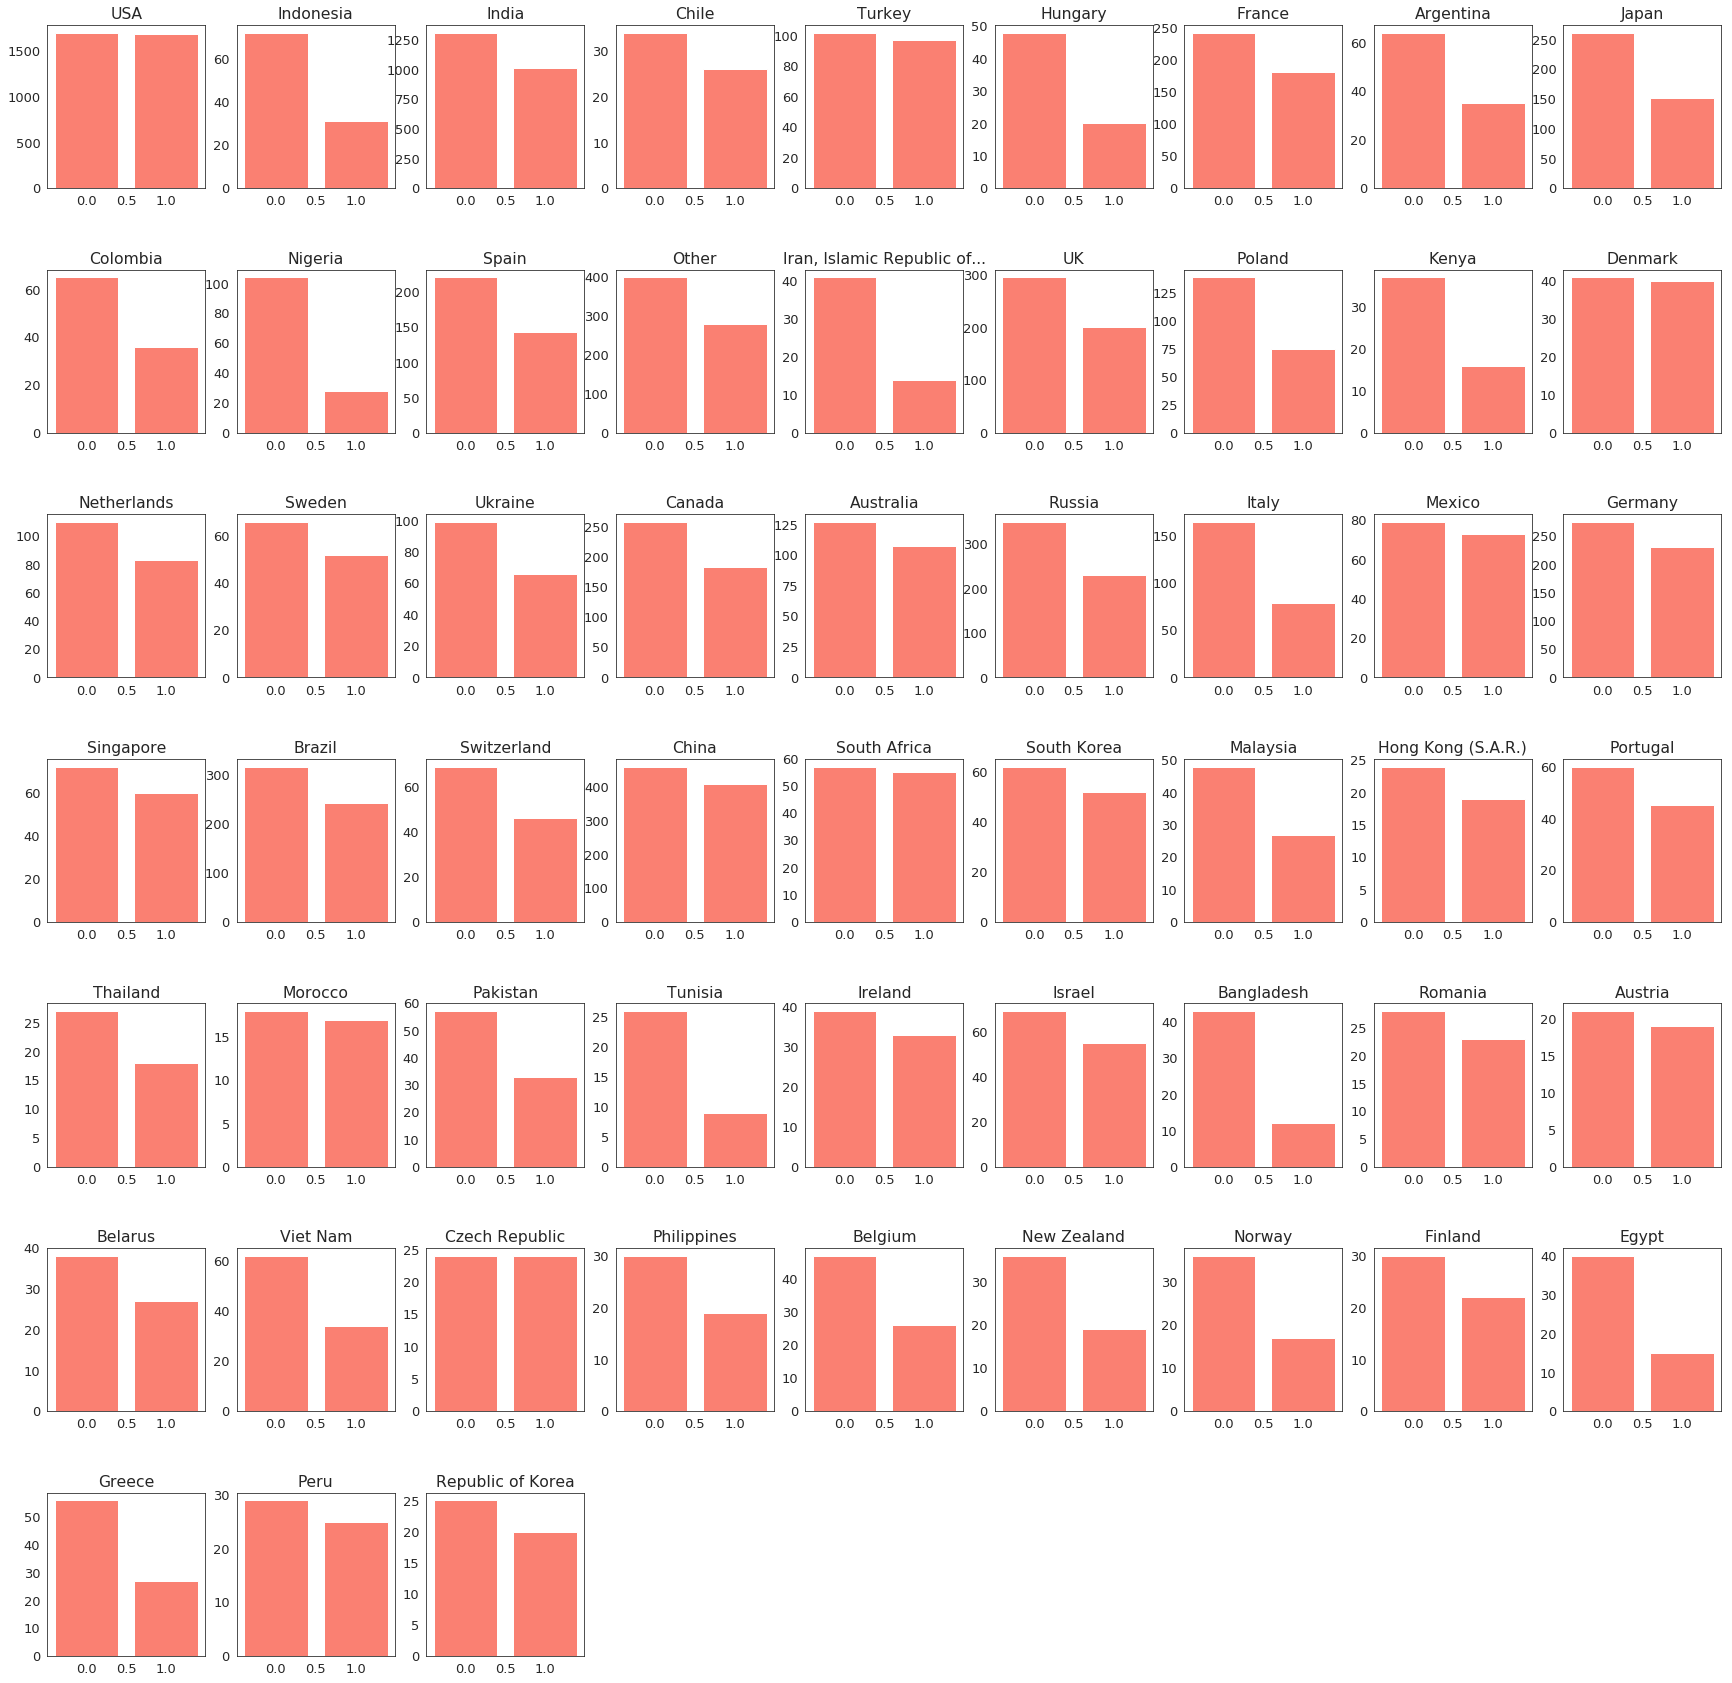

In [20]:
plt.figure(figsize=(30,30))
plt.subplots_adjust(hspace=0.5)
k = 1
for country in Counter(New_data["Country"]).keys():
    dataX = New_data[New_data['Country'] == country]
    y = np.array(dataX['Salary(USD)'].dropna())
    Y = np.zeros(len(y))
    Y[y > np.median(y)] = 1
    plt.subplot(7,9,k)
    plt.bar(Counter(Y).keys(),Counter(Y).values(),color="salmon")
    if country == 'United Kingdom of Great Britain and Northern Ireland':
        plt.title('UK')
    elif country == "United States of America":
        plt.title("USA")
    else:
        plt.title(country)
    k += 1
plt.show()

In [21]:
nuevo=New_data
nuevo=nuevo[nuevo.Education != "I prefer not to answer"]
nuevo=nuevo[nuevo.Education != 'No formal education past high school']
y=np.zeros(len(New_data))
for j in sorted(Counter(nuevo.Education.dropna()).keys()):
    if j=="Bachelor’s degree":
        y[New_data["Education"]==j]=2
    if j=="Master’s degree":
        y[New_data["Education"]==j]=4
    if j=="Professional degree":
        y[New_data["Education"]==j]=3
    if j=="Doctoral degree":
        y[New_data["Education"]==j]=5
    if j=="Some college/university study without earning a bachelor’s degree":
        y[New_data["Education"]==j]=1
New_data["New_Education"]=y

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [22]:
y=np.ones(len(New_data))
y[New_data.Gender=="Female"]=0
New_data["New_Gender"]=y

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Visualisation of Data In Latin America

We start visualizing the data in Latin america, to do this we plot if there is any difference between Females and Males in diferent countries.

In [23]:
def plotting_Caracteristics_lat(Caracter):
    plt.figure(figsize=(10,15))
    plt.subplots_adjust(hspace=0.5)
    k=1
    for latcountry in Lat_american:
        plt.subplot(6,2,k)
        Patos=New_data[["Country","New_Education","Gender","New_Gender","New_Experience","New_Age","Salary(USD)"]].dropna()
        Patos=Patos[Patos["Country"]==latcountry]
        Patos=Patos[Patos["Gender"]=="Female"]
        y = Patos['Salary(USD)']
        Y = np.zeros(len(y))
        Y[y > np.median(y)] = 1
        plt.scatter(Patos[Caracter],Y,color="violet",label="Female")
        plt.title(latcountry)
        plt.legend() 
        k+=1
        plt.subplot(6,2,k)
        Patos=New_data[["Country","New_Education","Gender","New_Gender","New_Experience","New_Age","Salary(USD)"]].dropna()
        Patos=Patos[Patos["Country"]==latcountry]
        Patos=Patos[Patos["Gender"]=="Male"]
        y = Patos['Salary(USD)']
        Y = np.zeros(len(y))
        Y[y > np.median(y)] = 1
        plt.scatter(Patos[Caracter],Y,color="firebrick",label="Male")
        plt.title(latcountry)
        plt.legend() 
        k+=1
    plt.show()

### Education of people in different countries

To visualize this we stablish a rank which is given according to the level of study, where not finishing the Bachelor corresponds to 1 and having a Phd corresponds to 5 (this is an arbitrary rule we created to visualize).

In the next plots we show the level of education vs a binary variable which is defines as:
* The value 1 means that that person earns more than the meadian
* The value 0 means that the person earns less than the median

"In the following plots we make the distinction between Males and Females (this only to see if we can trivially apply a model to fit the data)"

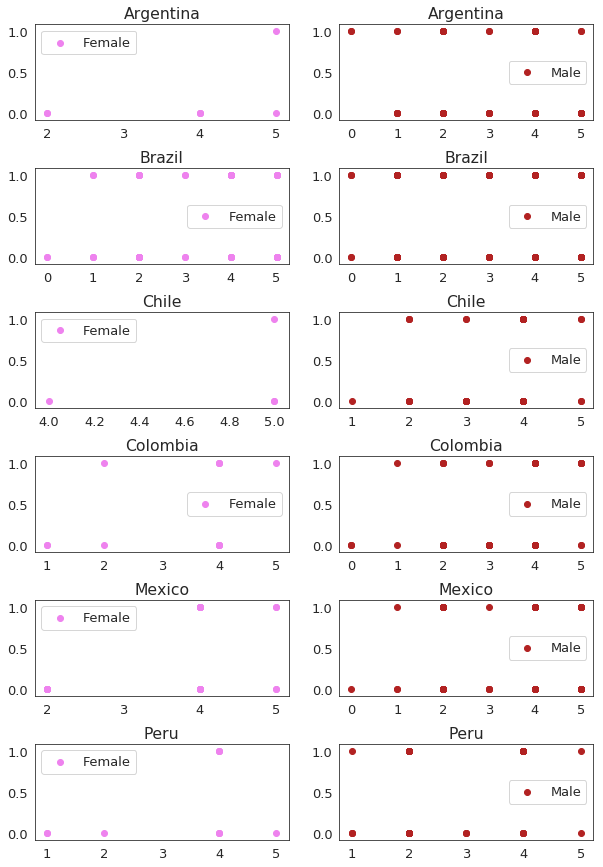

In [24]:
plotting_Caracteristics_lat("New_Education")

### Experience of people in different countries

In the next plots we show the years of experience vs the binary variable of the median salary

"In the following plots we make the distinction between Males and Females (this only to see if we can trivially apply a model to fit the data)"

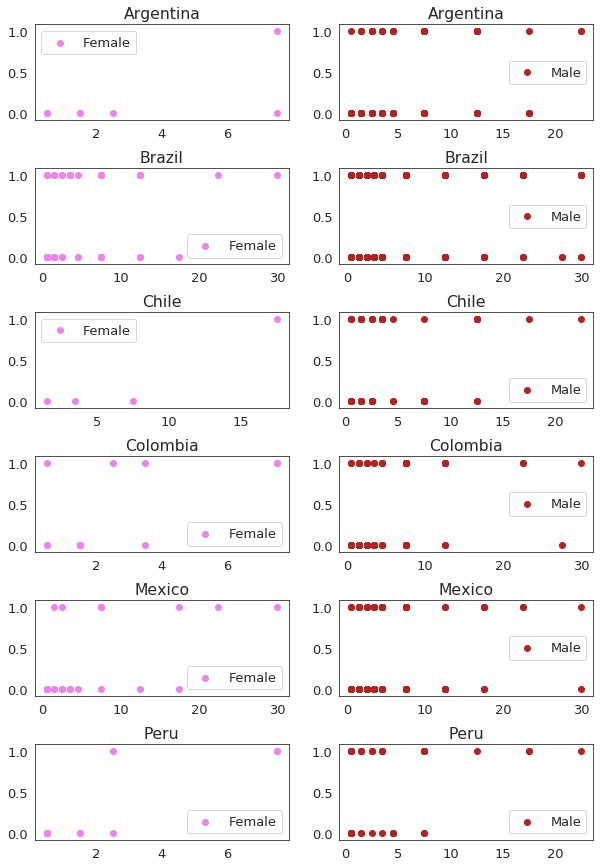

In [25]:
plotting_Caracteristics_lat("New_Experience")

### Age of people in different countries

In the next plots we show the age of the people vs the binary variable of the median salary

"In the following plots we make the distinction between Males and Females (this only to see if we can trivially apply a model to fit the data)"

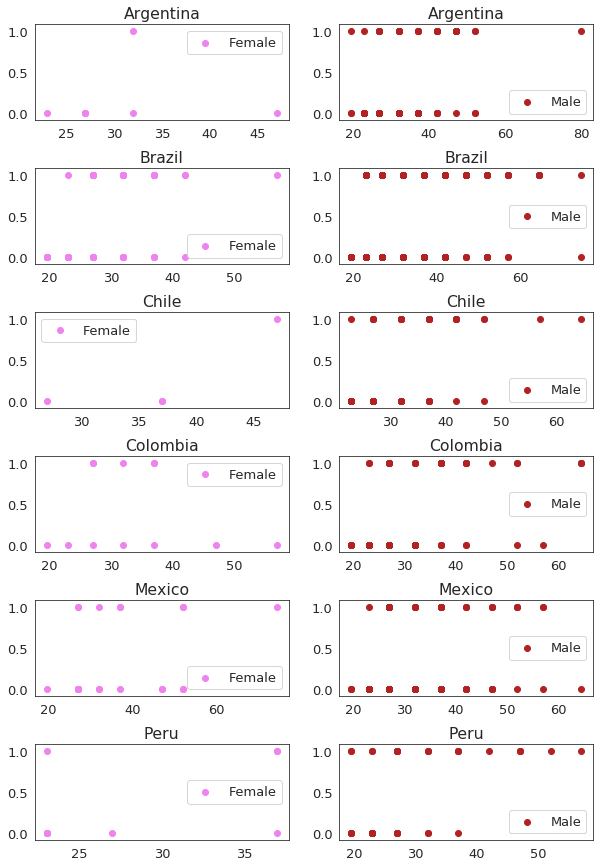

In [26]:
plotting_Caracteristics_lat("New_Age")

# Most important Variables

Now we finally with all the visualization we have done before we start study the most important variables, to do this we apply a model of logistic regression and a Linear discriminant analysis to study the importance of the variables of Education, Gender, Experience and Age for the case of Latin American countries.

In [27]:
def Normalise_data(data):
    data_new=(data-np.mean(data))/np.std(data)
    return data_new

In [28]:
def summary_fit(X, Y, f_method,Yes, No, plot=True):
    # Split in train and test
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.2)

    #  Fit with train
    f_method.fit(X_train, Y_train)

    # Predict with test
    predict = f_method.predict(X_test)

    # This is the probability for the '+' class
    proba_yes = f_method.predict_proba(X_test)[:,1]

    # loop over n_p different values for the threshold probabiity
    n_p = 100
    error_rate = np.zeros(n_p)
    precision = np.zeros(n_p)
    recall = np.zeros(n_p)
    tp_rate = np.zeros(n_p)
    fp_rate = np.zeros(n_p)
    threshold = np.linspace(0,0.99, n_p)

    for i in range(n_p):
        ii = proba_yes>threshold[i]
        predict[ii] = Yes
        predict[~ii] = No
        true_positive = (Y_test == Yes) & (predict == Yes) 
        false_positive = (Y_test == No) & (predict == Yes)
        false_negative = (Y_test == Yes) & (predict == No)
        true_negative = (Y_test == No) & (predict == No)
        n_tp = np.count_nonzero(true_positive)
        n_fp= np.count_nonzero(false_positive)
        n_fn = np.count_nonzero(false_negative)
        n_tn = np.count_nonzero(true_negative)
        if((n_tp+n_fp)>0): precision[i] = n_tp/(n_tp + n_fp)
        if((n_tp+n_fn)>0): recall[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
        if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)

    # compute the area under each curve
    ii = np.argsort(recall)
    pr_area = scipy.integrate.trapz(precision[ii], recall[ii])
    
    ii = np.argsort(fp_rate)
    roc_area = scipy.integrate.trapz(tp_rate[ii], fp_rate[ii])
            
    # compute F1
    F1 = np.max(2.0*precision*recall/(precision+recall+1E-12))
    if plot:
        l = 'Predictors:'
        for k in X.keys(): 
            l=l+' '+k
        
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.plot(recall, precision)
        plt.xlabel('RECALL')
        plt.ylabel('PRECISION')
        plt.title('PRECISION-RECALL, AREA={:.2f}'.format(pr_area))
        plt.xlim([0,1])
        plt.ylim([0,1])

        plt.subplot(1,2,2)
        plt.plot(fp_rate, tp_rate, label=l)
        plt.xlabel('FALSE POSITIVE RATE')
        plt.ylabel('TRUE POSITIVE RATE')
        plt.title('ROC, AREA={:.2f}'.format(roc_area))
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.legend()
        plt.show()
    return {'pr_area':pr_area, 'roc_area':roc_area, 'F1':F1}

In [29]:
def find_best_predictors(X, Y, all_predictors, f_method,Yes,No):
    best = {'pr_area':0.0, 'roc_area':0.0, 'F1':0.0, 'predictors':''}

    # loop over all possible number of predictors
    for n_predictors in range(1,len(all_predictors)+1):
    
        # get all combinations of predictors of lenght=n_predictors
        combinations = itertools.combinations(all_predictors, n_predictors)
        for c in combinations:
            predictors = list(c)
            X_in = X[predictors]
            
            # if n_predictors=1, try it
            if(n_predictors==1): 
                # print('Trying these predictors', predictors) #We comment this printing
                areas = summary_fit(X_in, Y, f,Yes,No, plot=False)
            else:
                intersection = list(set(best['predictors']) & set(predictors))
                # only try the new predictors if they include the best['predictors']
                if len(intersection)==len(best['predictors']):
                    # print('Trying these predictors', predictors) #We comment this printing
                    areas = summary_fit(X_in, Y, f,Yes,No, plot=False)
                    
            # update the best values if needed. The best model increases, the ROC area and the Prec-Recall area and F1.
            if areas['pr_area']>best['pr_area'] and areas['roc_area']>best['roc_area'] and areas['F1'] > best['F1']:
                best['pr_area'] = areas['pr_area']
                best['roc_area'] = areas['roc_area']
                best['F1'] = areas['F1']
                best['predictors'] = predictors
                # print('\t\t UPDATED BEST RESULTS: {}'.format(best)) #We comment this printing
    return best

In [30]:
all_predictors=["New_Education","New_Gender","New_Experience","New_Age"]
methods=["Logistic","Discriminant"]
Yes=1
No=0

In [ ]:
for country in Lat_american:
    X_dat=New_data[["Country","New_Education","Gender","New_Gender","New_Experience","New_Age","Salary(USD)"]].dropna().reset_index(drop=True)
    X_dat=X_dat[X_dat["Country"]==country]
    X_dat=X_dat[X_dat["Gender"]!="Prefer not to say"]
    X_dat=X_dat[X_dat["Gender"]!="Prefer to self-describe"]
    y = X_dat['Salary(USD)']
    Y = np.zeros(len(y))
    Y[y > np.median(y)] = 1
    X=X_dat[all_predictors]
    X=Normalise_data(X)
    for method in methods:
        N=100
        if method == "Logistic":
            # Find the best for Logistic Regression
            f = sklearn.linear_model.LogisticRegression(solver='lbfgs')
            # best = find_best_predictors(X, Y, all_predictors, f)
            # print(best["predictors"])
            archivo = open("Logistic_regression_"+country+".txt","w")
            for i in range(N):
                best = find_best_predictors(X, Y,all_predictors, f, Yes, No)
                archivo.write(str(best["predictors"])+"\n")
                #print((i+1)/N)
            archivo.close()
            print("Done " + method+ " "+ country)
        else:
            # Find the best with Linear Discriminant Analysis
            f = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd',tol=0.0001)
            archivo = open("Linear_Discriminant_"+country+".txt","w")
            for i in range(N):
                best = find_best_predictors(X, Y, all_predictors, f,Yes, No)
                archivo.write(str(best["predictors"])+"\n")
                #print((i+1)/N)
            archivo.close()
            print("Done " + method + " "+ country)

Done Logistic Argentina
Done Discriminant Argentina
Done Logistic Brazil
Done Discriminant Brazil
Done Logistic Chile
Done Discriminant Chile
Done Logistic Colombia


In [ ]:
def Analisis_of_data(archivo,tolerance,method):
    a= open(archivo,"r")
    lines= a.readlines()
    total=[]
    for i in lines:
        i=i[1:-2]
        l = i.split(",")
        total += l
    variables={}
    for i in total:
        if i in variables:
            continue
        else:
            variables[i]=total.count(i) 
    decide = []
    for i in variables.keys():
        if variables[i] < tolerance*len(lines):
            continue
        else:
            decide.append(i)
    print("the revelant variables are: ",decide," with precision of ",tolerance*100,"% with the method of",method)


In [ ]:
prec=0.40
for country in Lat_american:
    print("-"*10,country,"-"*10)
    Analisis_of_data("Logistic_regression_"+country+".txt",prec,"Logistic regression")
    Analisis_of_data("Logistic_regression_"+country+".txt",prec,"Linear Discriminant")

# Results

Here we finnaly see that apparently the Gender is not important in Latin America at the moment of predicting the Wage of a person, apparently in all latin america the most important variables are The education and the Age, with a precision of $40\%$.

Even though this is not an strong result to determine that these are the most important variables, it show us that at least for people in Latin america who works with data shouldn't worry about their gender for earning more than the median in their countries.